In [10]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize



In [11]:
% matplotlib inline

In [12]:
def load_data(database_filepath):
    # load data from database
    engine_str = 'sqlite:///' + database_filepath
    
    print(engine_str)
    engine = create_engine(engine_str)
    df = pd.read_sql_table("messages", engine)
    
    return df 
    
#    print(df.head(5))
    
#    
    
    
 #   print(Y.head(),Y.columns)
 #   cols = Y.columns.tolist()
    #X,Y,cols
    
def push_data(df,database_filepath):
    # load data from database
    engine_str = 'sqlite:///' + database_filepath
    
    print(engine_str)
    engine = create_engine(engine_str)
    df = pd.read_sql_table("messages", engine)
    
    return df    

In [13]:
df = load_data('data/DisasterResponse.db')

sqlite:///data/DisasterResponse.db


In [14]:
display(df.head())

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [118]:
X = df['message']


Y = df.drop(['message','original','genre','id'],axis=1)


Y.drop(['related'],inplace=True,axis=1)


X = X [Y.sum(axis=1) !=0]

Y = Y[Y.sum(axis=1) !=0]


Y = Y.reset_index()
Y.set_index('index',inplace=True)

Y = Y[Y==1].stack().reset_index().drop(0,1)


Y = Y.groupby(by='index').first().reset_index()
Y = Y['level_1']
Y = Y.rename("Classes")
Y

0            aid_related
1                request
2        weather_related
3                request
4                request
              ...       
14780        aid_related
14781        aid_related
14782        aid_related
14783            request
14784        aid_related
Name: Classes, Length: 14785, dtype: object

In [119]:
pipeline = Pipeline([
    
    ('countVec',CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer())
    ])

X = pipeline.fit_transform(X)

In [122]:
X.shape,Y.shape

((14785, 23081), (14785,))

In [124]:
X.to_dense().to_csv('plot_data',index=False)
Y.to_csv('plot_classes',index=False)

AttributeError: to_dense not found

In [51]:
Y.head()

,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re	


def tokenize(text):
    
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens
    

In [84]:
Y.shape

(14785,)

In [46]:
for col in Y.columns.tolist():
    print(col.capitalize())
    text = ','.join(X[Y[col]==1].tolist())

    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    #text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    #tokens = word_tokenize(text)
    #tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    #tokens = list(set(tokens))
    #clean_text = ','.join(tokens).replace(',',' ')
    #if len(clean_text) >10:
        #wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(clean_text)

        #plt.figure(figsize=(8,10))
        #plt.imshow(wordcloud, interpolation="bilinear")
        #plt.axis("off")
        #plt.savefig(col.capitalize() +'.jpg', bbox_inches='tight')
        #plt.show()

Related
Request
Offer
Aid_related
Medical_help
Medical_products
Search_and_rescue
Security
Military
Child_alone
Water
Food
Shelter
Clothing
Money
Missing_people
Refugees
Death
Other_aid
Infrastructure_related
Transport
Buildings
Electricity
Tools
Hospitals
Shops
Aid_centers
Other_infrastructure
Weather_related
Floods
Storm
Fire
Earthquake
Cold
Other_weather
Direct_report


In [21]:
from yellowbrick.text import TSNEVisualizer

/home/moglix/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [125]:
type(X)

scipy.sparse.csr.csr_matrix

In [129]:
from scipy import sparse

sparse.save_npz("tsne_data.npz", X)

In [127]:
your_matrix_back = sparse.load_npz("tsne_data.npz")

In [128]:
your_matrix_back.shape

(14785, 23081)

In [131]:
Y.to_csv('tsne_classes.csv',index=False)

In [74]:
from scipy import sparse
import pandas as pd

def get_tsne_data():
    
    X = sparse.load_npz("tsne_data.npz")
    Y = pd.read_csv('tsne_classes.csv')

,index,level_1
0,1,aid_related
1,3,request
2,6,weather_related
3,7,request
4,9,request
...,...,...
14780,26203,aid_related
14781,26205,aid_related
14782,26206,aid_related
14783,26207,request


In [133]:
tsne_results.shape

(14785, 2)

In [135]:
np.save('outfile', tsne_results)

In [137]:
from numpy import asarray
from numpy import save

In [138]:
data = asarray(tsne_results)
# save to npy file
save('data.npy', data)

In [143]:

5
6
# load numpy array from npy file
from numpy import load
def get_tsne_data():
    results = load('data.npy')
    classes = pd.read_csv('tsne_classes.csv')

In [140]:
tsne_results

array([[ 13.37159  ,   7.4133635],
       [  7.7382913,  -9.583387 ],
       [ 15.837061 ,   1.2755301],
       ...,
       [-14.903601 ,  12.973173 ],
       [ -6.019034 ,   4.684835 ],
       [-21.154245 ,  -3.8150125]], dtype=float32)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

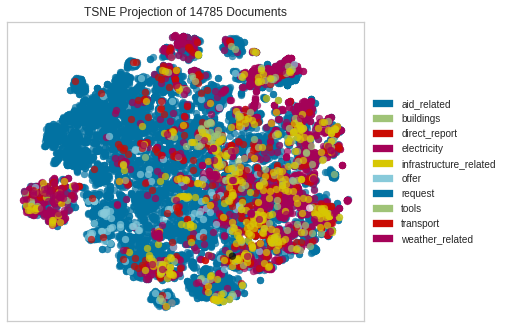

In [85]:
tsne = TSNEVisualizer()
tsne.fit(X, Y)
tsne.show()

In [87]:
from sklearn.manifold import TSNE
import seaborn as sns

In [88]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14785 samples in 0.003s...
[t-SNE] Computed neighbors for 14785 samples in 7.275s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14785
[t-SNE] Computed conditional probabilities for sample 2000 / 14785
[t-SNE] Computed conditional probabilities for sample 3000 / 14785
[t-SNE] Computed conditional probabilities for sample 4000 / 14785
[t-SNE] Computed conditional probabilities for sample 5000 / 14785
[t-SNE] Computed conditional probabilities for sample 6000 / 14785
[t-SNE] Computed conditional probabilities for sample 7000 / 14785
[t-SNE] Computed conditional probabilities for sample 8000 / 14785
[t-SNE] Computed conditional probabilities for sample 9000 / 14785
[t-SNE] Computed conditional probabilities for sample 10000 / 14785
[t-SNE] Computed conditional probabilities for sample 11000 / 14785
[t-SNE] Computed conditional probabilities for sample 12000 / 14785
[t-SNE] Computed conditional probabilities for sa

In [94]:
sns.set_style("whitegrid", {'axes.grid' : False})

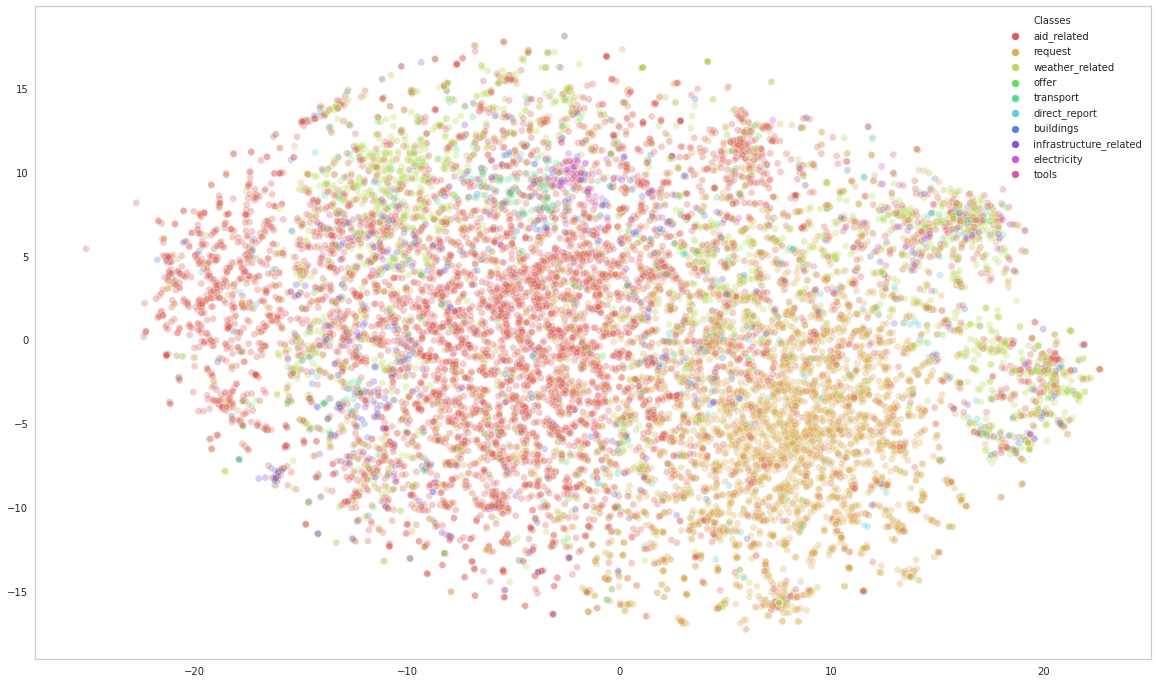

In [101]:
plt.figure(figsize=(20,12))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=Y,
    palette=sns.color_palette("hls", 10),
    
    legend="full",
    alpha=0.3
)

In [106]:
import plotly.express as px
fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1],color=Y,width=1200, height=600)
fig.show()